* <<데이터 요약>>
- 본 내용은 목차의 별표부터 보시면 됩니다
- ★resume 통합 : resume + education + language + certificate
- ★recruitment 통합 : recruitment + company

-  새 피처 생성, 상관관계 분석의 내용은
- 각 목차의 ★통합 파일의 하단 목록에 정리되어 있습니다.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt

# 나눔 바른고딕 폰트 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = plt.matplotlib.font_manager.FontProperties(fname=fontpath).get_name()

# 한국어 폰트 설정
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 고해상도 설정
%config InlineBackend.figure_format = 'retina'

'apt'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\usr\\share\\fonts\\truetype\\nanum\\NanumBarunGothic.ttf'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
apply_train= pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/apply_train.csv')
company= pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/company.csv')
recruitment = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/recruitment.csv')
resume = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume.csv')
resume_certificate = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_certificate.csv')
resume_education = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_education.csv')
resume_language = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_language.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/sample_submission.csv')

# 1. Resume 데이터 전처리
- resume
- resume_education
- resume_language
- resume_certificate

## resume 데이터 정리

결측치 높은 데이터 제거
- job_code_seq2      7982개 결측치
- job_code_seq3      8295개 결측치

In [ ]:
# resume 결측치 제거 (text_keyword, career_job_code 결측치 치환 예정)
resume = resume.drop(['job_code_seq2', 'job_code_seq3'], axis=1)
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resume_seq       8482 non-null   object 
 1   reg_date         8482 non-null   object 
 2   updated_date     8482 non-null   object 
 3   degree           8482 non-null   int64  
 4   graduate_date    8482 non-null   int64  
 5   hope_salary      8482 non-null   float64
 6   last_salary      8482 non-null   float64
 7   text_keyword     8287 non-null   object 
 8   job_code_seq1    8482 non-null   object 
 9   career_month     8482 non-null   int64  
 10  career_job_code  7724 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 729.0+ KB


In [ ]:
#resume 데이터 지원자번호 기준 오름차순 정리
resume = resume.sort_values(by='resume_seq')

## resume_education 데이터 정리

In [ ]:
#resume_education 데이터 지원자번호 기준 오름차순 정리
resume_education = resume_education.sort_values(by='resume_seq')
resume_education

,resume_seq,hischool_type_seq,hischool_special_type,hischool_nation,hischool_gender,hischool_location_seq,univ_type_seq1,univ_type_seq2,univ_transfer,univ_location,univ_major,univ_sub_major,univ_major_type,univ_score
5714,U00001,21,일반고,공립,여자학교,4,5,5,0,17,NaN,NaN,9,20.0
3375,U00002,0,기타,기타,기타,0,5,5,0,3,NaN,NaN,8,90.0
201,U00003,21,일반고,공립,남여공학,6,5,5,0,17,NaN,NaN,4,90.0
586,U00004,21,일반고,공립,남여공학,5,5,5,0,5,NaN,NaN,3,70.0
7970,U00005,21,일반고,공립,여자학교,5,0,0,0,0,NaN,NaN,10,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,U08478,21,일반고,공립,남여공학,3,5,5,0,5,NaN,NaN,19,0.0
5091,U08479,21,자율고,사립,남여공학,3,3,6,0,3,가정과,NaN,9,0.0
2775,U08480,0,기타,기타,기타,0,5,5,0,10,미술대학섬유패션코디네이션학과,NaN,9,80.0
334,U08481,21,자율고,공립,여자학교,5,5,5,0,5,NaN,NaN,9,60.0


## resume_language 데이터 정리

In [ ]:
#resume_language 데이터 지원자번호 기준 오름차순 정리
resume_language = resume_language.sort_values(by='resume_seq')
resume_language

,resume_seq,language,exam_name,score
45,U00004,2,11,661.62
701,U00005,2,4,873.74
205,U00039,2,4,848.48
645,U00054,2,4,909.09
769,U00067,2,2,20.00
...,...,...,...,...
424,U08443,4,5,676.77
728,U08461,2,4,676.77
278,U08465,2,11,11.11
212,U08472,2,4,611.11


## resume_certificate 데이터 정리

In [ ]:
#resume_language 데이터 지원자번호 기준 오름차순 정리
resume_certificate = resume_certificate.sort_values(by='resume_seq')
resume_certificate

,resume_seq,certificate_contents
6855,U00002,자동차 운전면허 (2종 보통)
6458,U00003,운전면허2종보통
4424,U00003,컬러리스트 기사
7553,U00003,워드프로세서 1급
1509,U00004,정보처리기능사
...,...,...
6980,U08480,컬러리스트기사
7043,U08480,컴퓨터패션디자인운용마스터
335,U08481,컴퓨터활용능력 2급
7386,U08482,컴퓨터그래픽스운용기능사


In [ ]:
resume_certificate['certificate_contents'].value_counts()

자동차 운전면허 1종보통       563
운전면허2종보통            547
자동차운전면허 1종 보통       453
자동차 운전면허 (2종 보통)    441
자동차운전면허1종 보통        359
                   ... 
세일즈매니저 2급             1
일러스트                  1
한자능력검점시험 6급           1
新JLPT N2              1
뷰티 코디네이터              1
Name: certificate_contents, Length: 1786, dtype: int64

In [ ]:
# 'certificate_contents' 열의 데이터를 모두 문자열로 변환
resume_certificate['certificate_contents'] = resume_certificate['certificate_contents'].astype(str)

#자격증 데이터 groupby
certificate_grouped = resume_certificate.groupby('resume_seq')['certificate_contents'].apply(lambda x: '/'.join(x)).reset_index()

In [ ]:
certificate_grouped

,resume_seq,certificate_contents
0,U00002,자동차 운전면허 (2종 보통)
1,U00003,운전면허2종보통/컬러리스트 기사/워드프로세서 1급
2,U00004,정보처리기능사/유통관리사 2급/MOS EXCEL 2003 EXPERT
3,U00006,운전면허 1종 보통/문서실무사1급/유통관리사 2급
4,U00007,샵마스터/자동차운전면허1종 보통/패턴 양장 기능사/MICROSOFT OFFICE E...
...,...,...
5971,U08476,운전면허2종보통
5972,U08479,컴퓨터그래픽스운용기능사
5973,U08480,2종 보통 운전면허증/컴퓨터그래픽스운용기능사/컬러리스트기사/컴퓨터패션디자인운용마스터
5974,U08481,컴퓨터활용능력 2급


## ★resume 통합


In [ ]:
#resume_all로 4개 레쥬메 파일 통합
resume_all = pd.merge(resume, resume_education, on='resume_seq', how='left')
resume_all = pd.merge(resume_all, resume_language, on='resume_seq', how='left')
resume_all = pd.merge(resume_all, certificate_grouped, on='resume_seq', how='left')

resume_all.head(10)

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,...,univ_transfer,univ_location,univ_major,univ_sub_major,univ_major_type,univ_score,language,exam_name,score,certificate_contents
0,U00001,2019-12-27,2020-02-01,4,2009,1500.0,1500.0,디자이너,재료·화학·섬유·의복,0,...,0,17,NaN,NaN,9,20.0,NaN,NaN,NaN,NaN
1,U00002,2020-04-24,2020-04-29,4,2005,0.0,0.0,디자이너,재료·화학·섬유·의복,73,...,0,3,NaN,NaN,8,90.0,NaN,NaN,NaN,자동차 운전면허 (2종 보통)
2,U00003,2018-02-14,2020-07-08,4,2004,0.0,0.0,남성복디자이너;TD캐주얼,재료·화학·섬유·의복,113,...,0,17,NaN,NaN,4,90.0,NaN,NaN,NaN,운전면허2종보통/컬러리스트 기사/워드프로세서 1급
3,U00004,2017-10-26,2020-04-27,4,2011,0.0,0.0,상품기획;영업기획,재료·화학·섬유·의복,27,...,0,5,NaN,NaN,3,70.0,2.0,11.0,661.62,정보처리기능사/유통관리사 2급/MOS EXCEL 2003 EXPERT
4,U00005,2020-03-18,2020-04-08,4,2011,0.0,0.0,인사;총무;경영;MD;상품기획,재료·화학·섬유·의복,0,...,0,0,NaN,NaN,10,50.0,2.0,4.0,873.74,NaN
5,U00006,2017-11-15,2020-10-18,3,0,3900.0,3500.0,매장영업관리,재료·화학·섬유·의복,99,...,0,17,NaN,NaN,18,0.0,NaN,NaN,NaN,운전면허 1종 보통/문서실무사1급/유통관리사 2급
6,U00007,2020-03-15,2020-09-24,4,0,1900.0,1700.0,VMD;디스플레이;디자이너;스타일리스트,재료·화학·섬유·의복,12,...,0,3,가정학과의상학,NaN,19,60.0,NaN,NaN,NaN,샵마스터/자동차운전면허1종 보통/패턴 양장 기능사/MICROSOFT OFFICE E...
7,U00008,2014-12-07,2020-02-23,4,2007,4100.0,3500.0,머천다이저;MD;영업MD;남성복,재료·화학·섬유·의복,55,...,0,10,NaN,NaN,0,70.0,NaN,NaN,NaN,자동차운전면허 1종 보통
8,U00009,2020-04-04,2020-04-11,4,2006,0.0,2100.0,섬유디자인;잡화디자인,디자인,40,...,0,13,NaN,NaN,19,80.0,NaN,NaN,NaN,MOS WORD 2000 CORE/MOS 파워포인트/한자실력 2급
9,U00010,2020-08-12,2020-08-18,4,1994,4100.0,4100.0,매장영업관리,재료·화학·섬유·의복,185,...,0,5,NaN,NaN,3,70.0,NaN,NaN,NaN,공인판매사2급/자동차운전면허증 1종 보통


### job 피처 생성

- 총 10개 카테고리로 세분화하였음
- 디자이너 > MD > 기타 순
- 📍None 863개 ->  세부 분류 필요

In [ ]:
# 세미콜론 맨 앞의 단어만 추출 /  새로운 컬럼 'job'
data=resume_all
resume_all = pd.DataFrame(data)

# "text_keyword" 컬럼에서 세미콜론 앞의 첫 번째 단어 추출하여 "job" 컬럼 생성
resume_all['job'] = resume_all['text_keyword'].str.split(';').str[0]

In [ ]:
# 직무키워드_카테코리 생성

job_dic = {
    '디자이너': ['디자이너', '디자인','여성복','남성복','아동복','의류','막내','데님','아웃도어','스포츠','캐주얼','패션','소재'],
    'MD':['상품기획','MD','기획','전략','머천다'],
    'VMD':['VMD','디스플레이'],
    '생산관리':['거래처','물류','소싱','생산','구매생산MD'],
    '경영관리' : ['경영','인사','회계','사무'],
    '바잉': ['바잉','섬유','바잉MD','수'],
    'TD':['TD','패턴','테크','패턴'],
    '마케팅':['홍보','마케팅'],
    '영업':['영업','거래처','영업MD''점포',],
    '매장관리':['백화점','판매','매장'],
    '기타':['None']
}

In [ ]:
def addD(x):
  result = 'None'
  for k in job_dic.keys():
    for s in job_dic[k]:
        if s in str(x):      #  ['디자이너', '디자인']
            result =k   # 디자이너
            break
  return result

resume_all['job'] = resume_all.apply(lambda x: addD(x['job']),axis=1)

In [ ]:
a= '산업디자이너'
#a in job_dic['디자이너']
'디자이너' in  a

True

In [ ]:
resume_all['job'].value_counts()

디자이너    2820
MD      1920
영업      1114
None     863
매장관리     755
VMD      313
생산관리     311
마케팅      167
바잉       134
경영관리     120
TD        14
Name: job, dtype: int64

- None 863개 세부 분류 필요

### certificate_cnt 피처 생성

- 자격증 개수 수치화
- recruitment의 qualifications(자격요건난이도)와 연관

In [ ]:
# 'certificate_cnt 새 피처 생성
def count_certificate_parts(text):
    if pd.isna(text):
        return 0  # 누락된 값은 0으로 처리
    else:
        return len(text.split('/'))

# 'certificate_cnt' 컬럼 생성
resume_all['certificate_cnt'] = resume_all['certificate_contents'].apply(count_certificate_parts)
resume_all

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,...,univ_major,univ_sub_major,univ_major_type,univ_score,language,exam_name,score,certificate_contents,job,certificate_cnt
0,U00001,2019-12-27,2020-02-01,4,2009,1500.0,1500.0,디자이너,재료·화학·섬유·의복,0,...,NaN,NaN,9,20.0,NaN,NaN,NaN,NaN,디자이너,0
1,U00002,2020-04-24,2020-04-29,4,2005,0.0,0.0,디자이너,재료·화학·섬유·의복,73,...,NaN,NaN,8,90.0,NaN,NaN,NaN,자동차 운전면허 (2종 보통),디자이너,1
2,U00003,2018-02-14,2020-07-08,4,2004,0.0,0.0,남성복디자이너;TD캐주얼,재료·화학·섬유·의복,113,...,NaN,NaN,4,90.0,NaN,NaN,NaN,운전면허2종보통/컬러리스트 기사/워드프로세서 1급,디자이너,3
3,U00004,2017-10-26,2020-04-27,4,2011,0.0,0.0,상품기획;영업기획,재료·화학·섬유·의복,27,...,NaN,NaN,3,70.0,2.0,11.0,661.62,정보처리기능사/유통관리사 2급/MOS EXCEL 2003 EXPERT,MD,3
4,U00005,2020-03-18,2020-04-08,4,2011,0.0,0.0,인사;총무;경영;MD;상품기획,재료·화학·섬유·의복,0,...,NaN,NaN,10,50.0,2.0,4.0,873.74,NaN,경영관리,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8526,U08478,2020-02-05,2020-03-31,4,2003,0.0,2700.0,상품기획,재료·화학·섬유·의복,60,...,NaN,NaN,19,0.0,NaN,NaN,NaN,NaN,MD,0
8527,U08479,2016-02-17,2020-07-15,3,0,2500.0,2300.0,디자이너,재료·화학·섬유·의복,59,...,가정과,NaN,9,0.0,NaN,NaN,NaN,컴퓨터그래픽스운용기능사,디자이너,1
8528,U08480,2019-11-13,2020-06-24,4,0,0.0,0.0,VMD;텍스타일디자인;섬유디자인;니트디자인;여성복디자인,디자인,0,...,미술대학섬유패션코디네이션학과,NaN,9,80.0,NaN,NaN,NaN,2종 보통 운전면허증/컴퓨터그래픽스운용기능사/컬러리스트기사/컴퓨터패션디자인운용마스터,VMD,4
8529,U08481,2020-07-09,2020-11-23,4,2015,0.0,2700.0,상품기획;머천다이저;기획MD,재료·화학·섬유·의복,8,...,NaN,NaN,9,60.0,NaN,NaN,NaN,컴퓨터활용능력 2급,MD,1


### career 피처 생성
- <분류 기준>
- 신입
- 1~3년
- 4~6년
- 7~9년
- 10~15년
- 16~20년
- 21년 이상


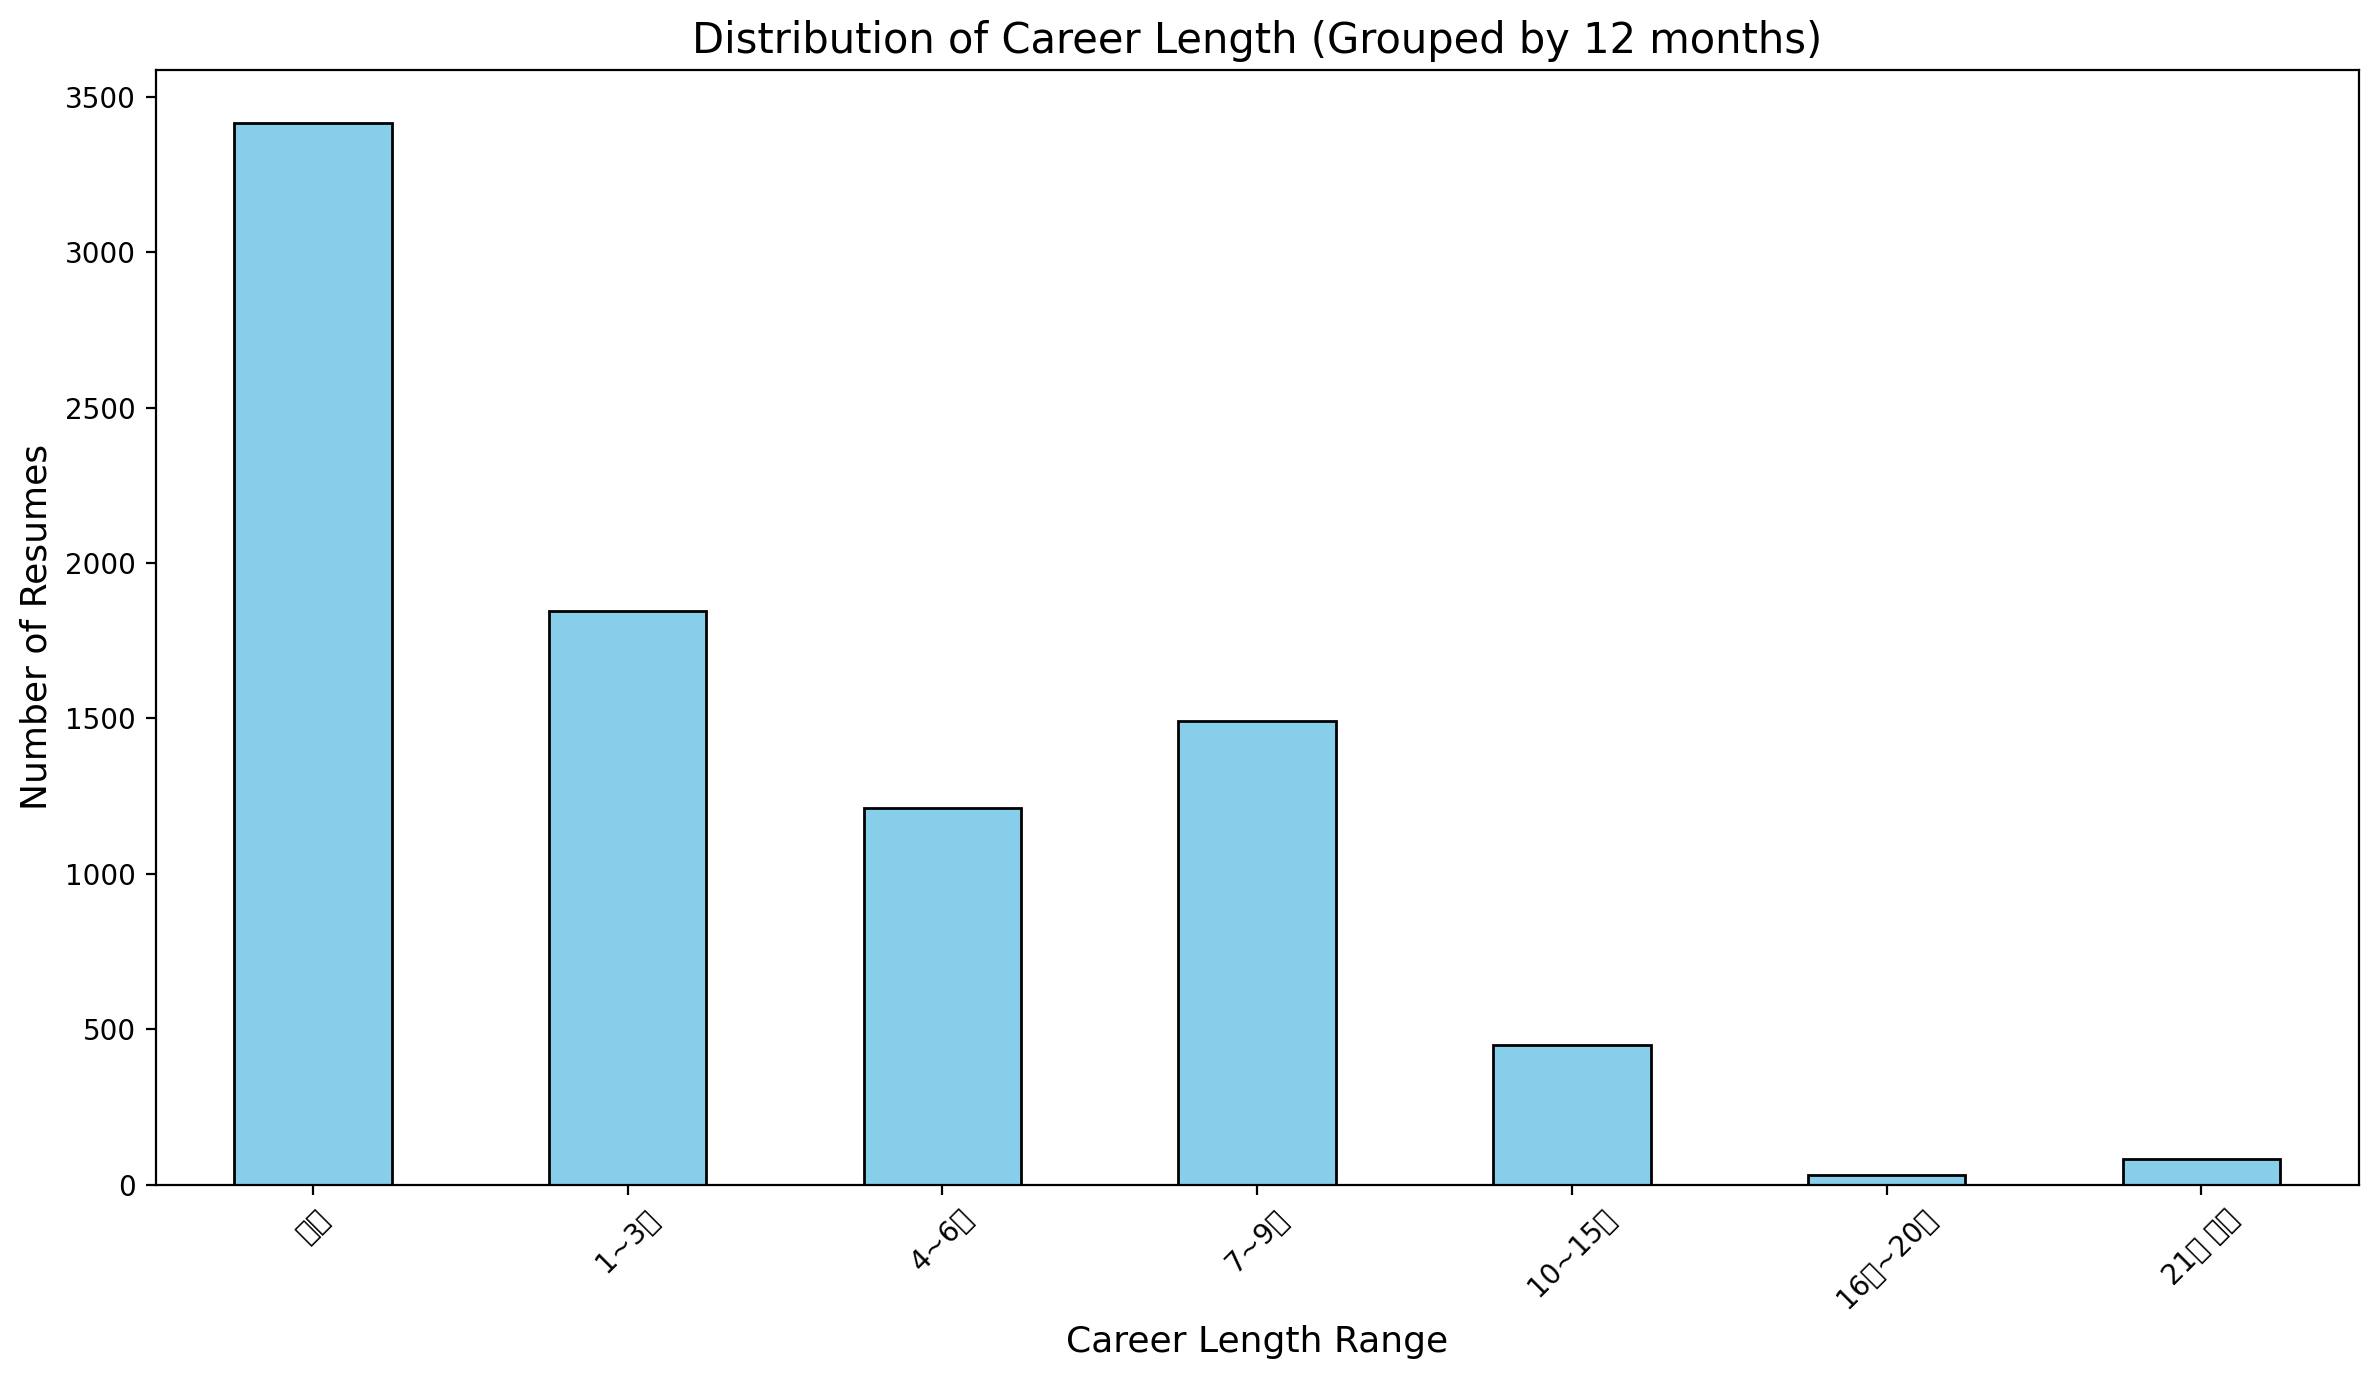

In [ ]:
bins = [-1, 36, 72, 108, 180, 240, 252, float('inf')]
labels = ['신입', '1~3년', '4~6년', '7~9년', '10~15년', '16년~20년', '21년 이상']

# career 새 컬럼 생성 후 범주화 데이터 넣기
resume_all['career'] = pd.cut(resume_all['career_month'], bins=bins, labels=labels)

# 각 범위별 빈도수 확인
career = resume_all['career'].value_counts().sort_index()

# 바 그래프로 시각화
plt.figure(figsize=(12, 7))
career.plot(kind='bar', color='skyblue', edgecolor='black')

# 그래프 설정
plt.title('Distribution of Career Length (Grouped by 12 months)', fontsize=15)
plt.xlabel('Career Length Range', fontsize=13)
plt.ylabel('Number of Resumes', fontsize=13)
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
# 각 구간별 인원수 확인
career = resume_all['career'].value_counts().sort_index()
career

신입         3416
1~3년       1847
4~6년       1212
7~9년       1492
10~15년      450
16년~20년      30
21년 이상       84
Name: career, dtype: int64

<career_month를 경력으로 범주화>

- 신입이 3416명으로 가장 많았고
- 1-3년차 1847명, 7-9년차 1492명,
- 4~6년차 1212명, 10-15년차 450명, 16-20년차 30명, 21년이상 84명으로 나타났다.


### resume 상관관계 분석

- univ_type_seq1   /   univ_type_seq2           0.798516
- career_month     /   last_salary              0.567240

- 최종대학(원)유형코드1, 최종대학(원)유형코드2 0.79로 높은 양의 상관관계를 보임

- 경력월, 최종연봉은 0.57로 양의 상관관계를 보임

In [ ]:
corr = resume_all.corr().unstack().sort_values(ascending=False).drop_duplicates().drop_duplicates()
corr.drop(corr.index[0],inplace=True)
display(corr.head())
display(corr.tail(5))

univ_type_seq1     univ_type_seq2           0.798516
career_month       last_salary              0.567240
hope_salary        last_salary              0.406650
hischool_type_seq  hischool_location_seq    0.405408
univ_location      univ_type_seq1           0.357624
dtype: float64

univ_type_seq2   language         -0.101237
univ_transfer    score            -0.101537
language         univ_type_seq1   -0.103093
certificate_cnt  last_salary      -0.167586
                 career_month     -0.218534
dtype: float64

### resume_all 그래프 분석

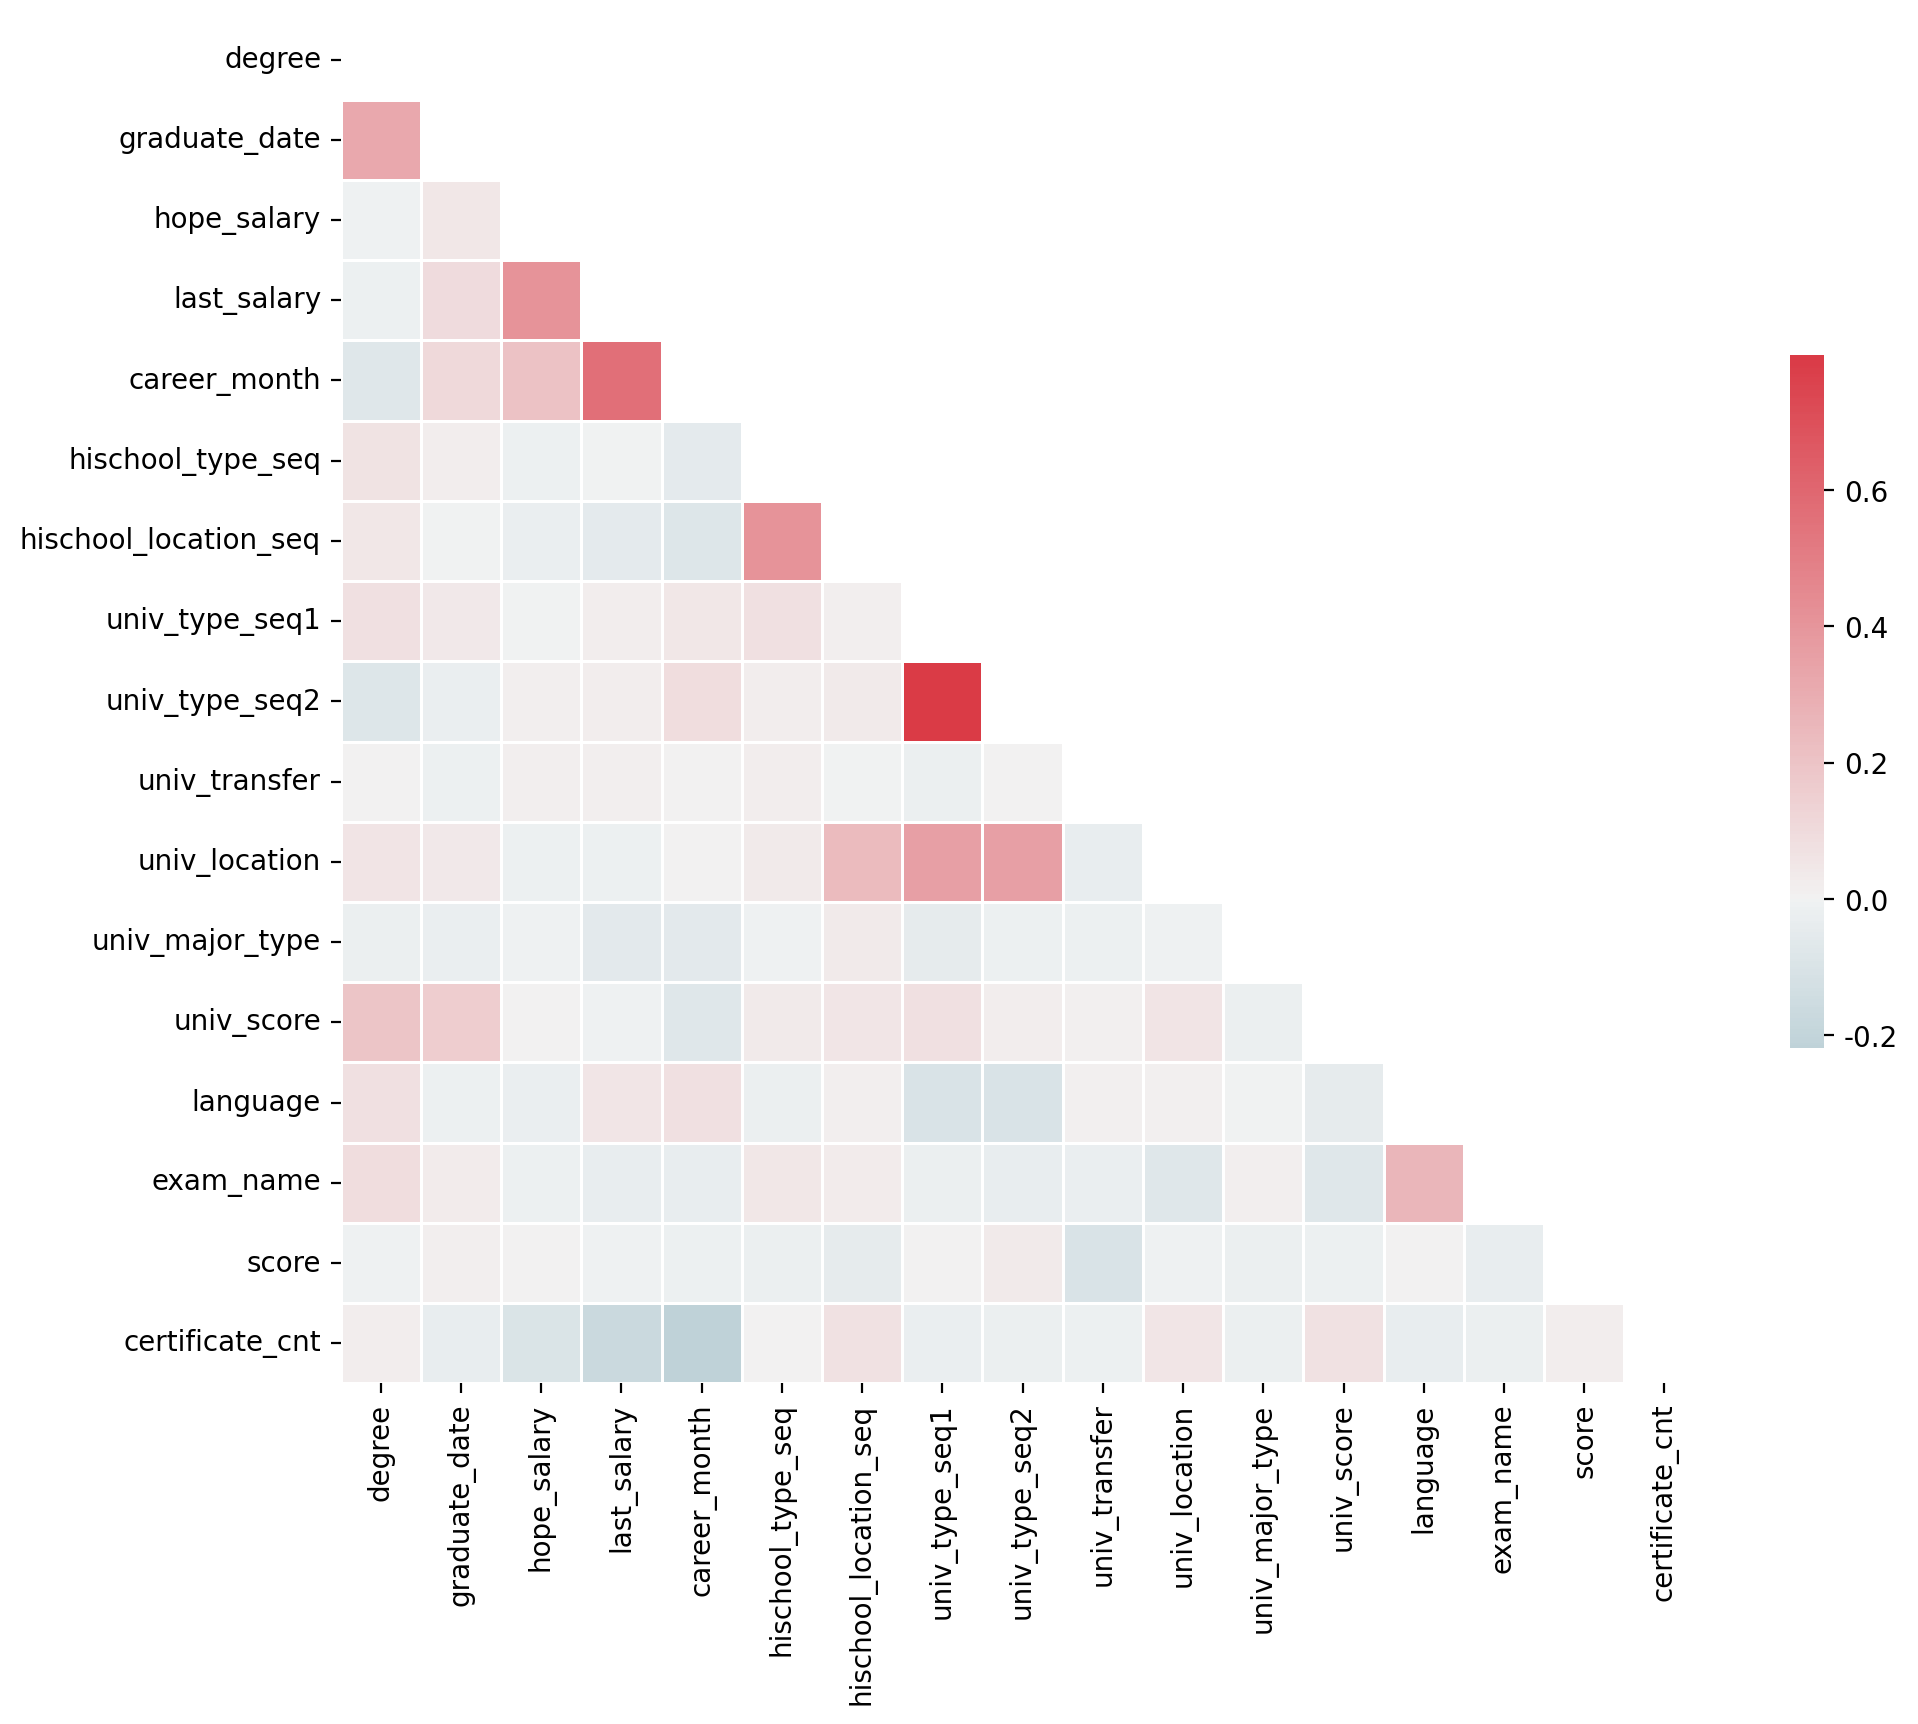

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = resume_all.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<가설>

```
univ_type_seq1
univ_type_seq2 이 둘은 높은 상관관계를 보임
-> (서울 및 수도권인가?)
```


# 2. Recruitment 데이터 전처리

- address_seq2와 address_seq3는 6000개 이상의 결측치를 가지고 있어 drop 하려고 했지만,
- 상관관계 그래프에서 새로운 가설이 생겨 보류 중이다

In [ ]:
recruitment.isnull().sum()

recruitment_seq         0
address_seq1            1
address_seq2         6595
address_seq3         6686
career_end              0
career_start            0
check_box_keyword       0
education               0
major_task              0
qualifications          0
text_keyword         5988
dtype: int64

In [ ]:
# ';'을 기준으로 데이터 분할 및 단어 수 카운트 함수
def count_keywords(row):
    keywords = row['check_box_keyword'].split(';')
    return len(keywords)

# 'check_box_keyword' 컬럼의 데이터를 ';'을 기준으로 분할하고 단어 수를 새로운 컬럼에 저장
recruitment['check_box_keyword_cnt'] = recruitment.apply(count_keywords, axis=1)
recruitment

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,text_keyword,check_box_keyword_cnt
0,R02264,3.0,NaN,NaN,0,0,2507;2707;2810,4,8,1,NaN,3
1,R06317,3.0,NaN,NaN,0,0,2204;2205;2707,3,2,1,NaN,3
2,R04017,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,1,NaN,4
3,R02865,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,1,NaN,4
4,R04890,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6690,R03678,3.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707,3,2,1,NaN,6
6691,R04593,3.0,NaN,NaN,0,0,2201;2204;2205;2707,4,2,1,NaN,4
6692,R03252,3.0,NaN,NaN,0,0,2109,3,2,1,NaN,1
6693,R05130,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,NaN,4


In [ ]:
recruitment['major_task'].unique()

array([ 8,  2,  7,  1, 10,  9,  6])

In [ ]:
recruitment['check_box_keyword'].nunique()

761

## ★recruitment 통합
- recruit_all

In [ ]:
#recruit_all로 파일 통합
recruit_all = pd.merge(recruitment, company, on='recruitment_seq', how='left')

In [ ]:
#오름차순 정리
recruit_all.sort_values(by='recruitment_seq', ascending=True)

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,text_keyword,check_box_keyword_cnt,company_type_seq,supply_kind,employee
4573,R00001,5.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707;2810,2,2,1,NaN,7,5.0,201.0,631.0
5915,R00002,3.0,NaN,NaN,0,0,2507;2703;2707,3,2,1,NaN,3,2.0,201.0,160.0
6454,R00003,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,2,NaN,4,NaN,NaN,NaN
5905,R00004,3.0,NaN,NaN,0,0,2507;2707,3,2,1,NaN,2,2.0,402.0,500.0
4197,R00005,3.0,NaN,NaN,0,0,2507;2707,3,2,1,NaN,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,R06691,3.0,NaN,NaN,0,0,2501;2507;2707,3,2,1,NaN,3,NaN,NaN,NaN
2367,R06692,3.0,NaN,NaN,0,0,2201;2507,3,2,2,NaN,2,4.0,402.0,150.0
6235,R06693,5.0,NaN,NaN,0,0,2102;2707,4,2,1,NaN,2,NaN,NaN,NaN
3298,R06694,3.0,NaN,NaN,0,0,2101;2108;2109;2110;2201;2203;2707,4,2,1,NaN,7,NaN,NaN,NaN


In [ ]:
recruit_all['company_type_seq'].unique()

array([ 5., nan,  2.,  4.,  9.,  7.,  3.])

### recruit_all 상관관계 분석

In [ ]:
#recruit_all 상관관계 분석
corr = recruit_all.corr().unstack().sort_values(ascending=False).drop_duplicates().drop_duplicates()
corr.drop(corr.index[0],inplace=True)
display(corr.head())
display(corr.tail(5))

address_seq2           qualifications      0.332134
check_box_keyword_cnt  address_seq2        0.257116
address_seq3           address_seq2        0.251298
supply_kind            company_type_seq    0.179893
company_type_seq       address_seq1        0.140597
dtype: float64

education       address_seq2   -0.321367
qualifications  address_seq3   -0.446121
address_seq1    address_seq3   -0.791208
education       address_seq3   -0.843788
address_seq1    career_end           NaN
dtype: float64

- <recruit_all 상관관계 분석>
- 1) education       address_seq3   -0.843788 음의 상관관계를 보이고 있다
- -> address_seq3은 '지방'일까?

In [ ]:
recruit_all.isnull().sum()

recruitment_seq             0
address_seq1                1
address_seq2             6595
address_seq3             6686
career_end                  0
career_start                0
check_box_keyword           0
education                   0
major_task                  0
qualifications              0
text_keyword             5988
check_box_keyword_cnt       0
company_type_seq         4318
supply_kind              4318
employee                 4318
dtype: int64

- recruitment + company 통합하니 company 널값이 4318개가 나옴 -> 따로 봐야 하나..?

### company_size 컬럼 생성

In [ ]:
# company_size 컬럼 생성
recruit_all['company_size'] = pd.cut(recruit_all['employee'],
    bins=[-1, 50, 300, 1000, float('inf')],
    labels=['소기업', '중소기업', '중견기업', '대기업'])

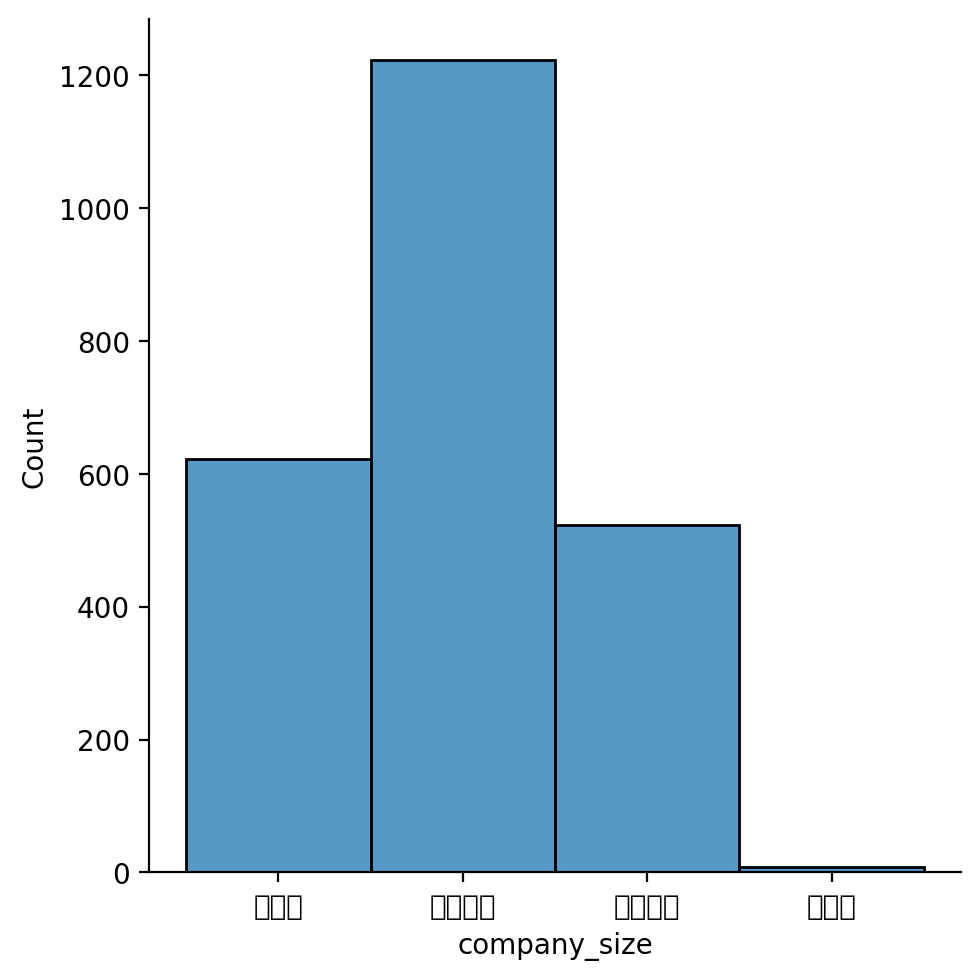

In [ ]:
sns.displot(recruit_all, x="company_size")

In [ ]:
recruit_all['company_size'].value_counts()

중소기업    1223
소기업      623
중견기업     523
대기업        8
Name: company_size, dtype: int64

- 중소기업의 수가 1223개로 가장 많다.
- 중소기업 > 소기업 > 중견기업 > 대기업 순이다
- 기업 규모별 count는 위의 결과값 참고

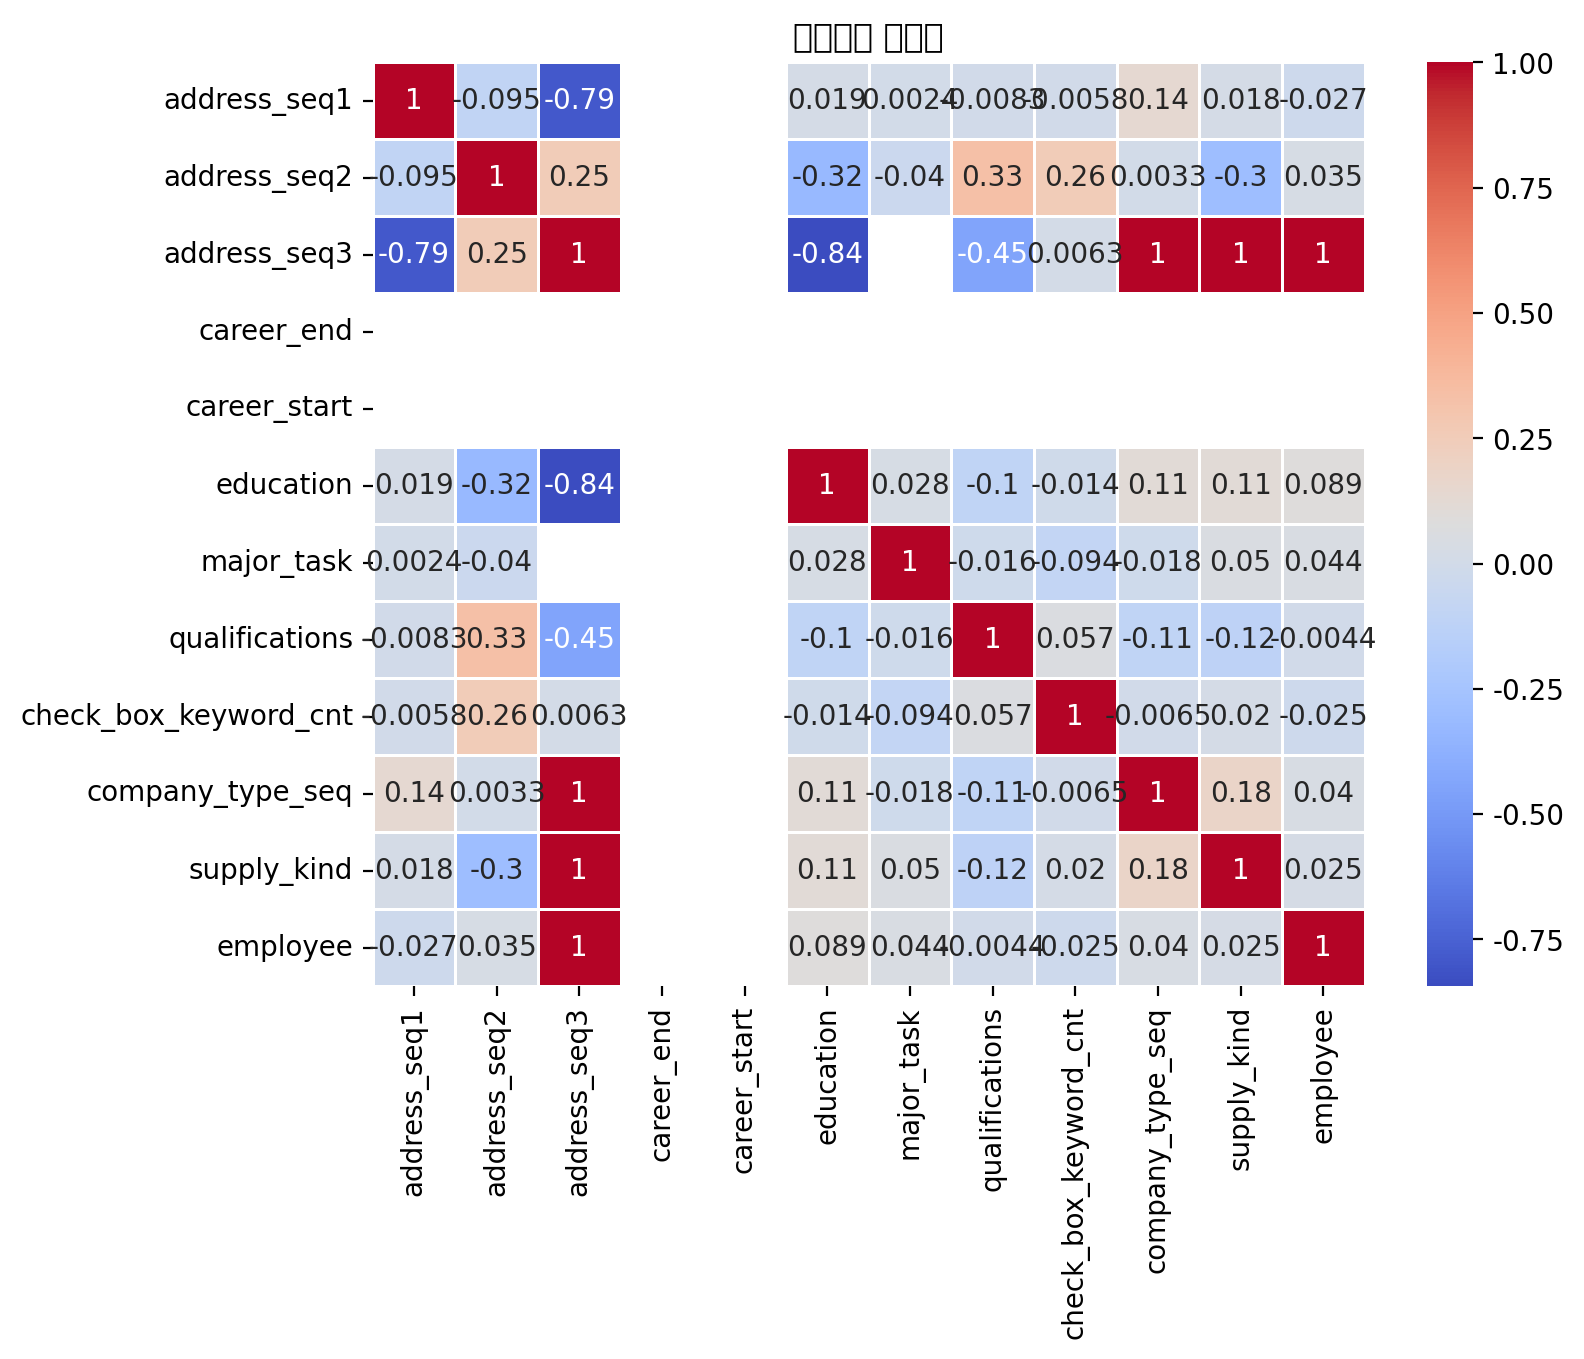

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 프레임 생성 (본인의 데이터로 대체)
data = pd.DataFrame(recruit_all)

# 상관관계 계산 (기본적으로 피어슨 상관관계를 계산)
correlation_matrix = recruit_all.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('상관관계 히트맵')
plt.show()

In [ ]:
#last_salary 와 career_month 상관관계 분석 -> 하려면 우선 career_month 구간화 작업 먼저!

In [ ]:
recruitment.corr()

,address_seq1,address_seq2,address_seq3,career_end,career_start,education,major_task,qualifications,check_box_keyword_cnt
address_seq1,1.000000,-0.095073,-0.791208,NaN,NaN,0.018978,0.002438,-0.008282,-0.005768
address_seq2,-0.095073,1.000000,0.251298,NaN,NaN,-0.321367,-0.039586,0.332134,0.257116
address_seq3,-0.791208,0.251298,1.000000,NaN,NaN,-0.843788,NaN,-0.446121,0.006292
career_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
career_start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,0.018978,-0.321367,-0.843788,NaN,NaN,1.000000,0.027816,-0.104869,-0.013668
major_task,0.002438,-0.039586,NaN,NaN,NaN,0.027816,1.000000,-0.015535,-0.094482
qualifications,-0.008282,0.332134,-0.446121,NaN,NaN,-0.104869,-0.015535,1.000000,0.056667
check_box_keyword_cnt,-0.005768,0.257116,0.006292,NaN,NaN,-0.013668,-0.094482,0.056667,1.000000


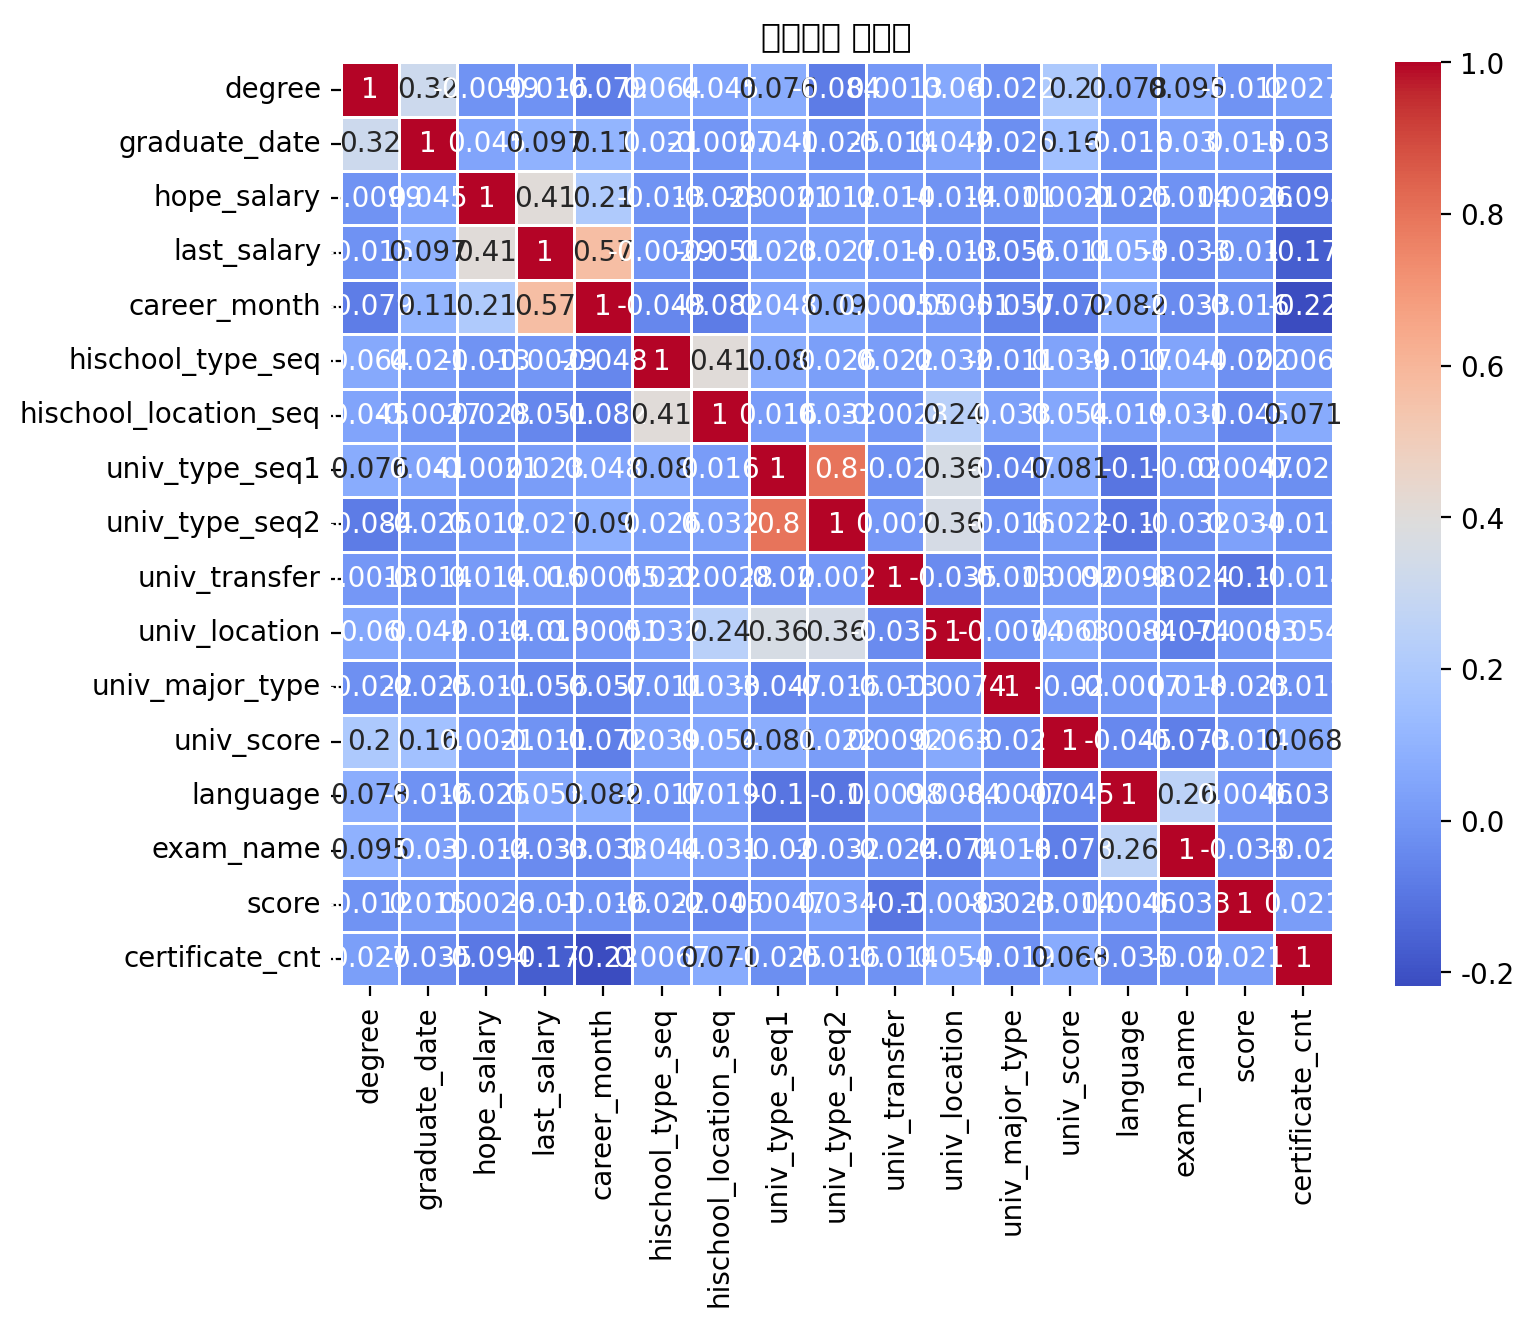

In [ ]:
data = pd.DataFrame(resume_all)

# 상관관계 계산 (기본적으로 피어슨 상관관계를 계산)
correlation_matrix = resume_all.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('상관관계 히트맵')
plt.show()

In [ ]:
resume_all['career_month']

0         0
1        73
2       113
3        27
4         0
       ... 
8526     60
8527     59
8528      0
8529      8
8530      0
Name: career_month, Length: 8531, dtype: int64

In [ ]:
#경력별 카운드 (그냥 세분화 해봄)
career_month_range_counts

NameError: ignored

In [ ]:
#last_salary 와 career_month 상관관계 그래프 그려보기

import seaborn as sns

sns.set_theme(style="darkgrid")

resume_all = pd.read_csv("/content/drive/MyDrive/dev/DACON/1. 국민대/resume.csv")

sns.relplot(data=resume_all, x="career_month", y="last_salary", hue="hope_salary")

- <last_salary 와 career_month 상관관계 분석>
- 전체 인원의 최종 연봉은 2000만원 ~ 4000만원 구간이 가장 많다.

hppe_salary 와 last_salary

### check_box_keyword_1 피처 생성
- recruitment 데이터 중 check_box_keyword (모집직무코드)를 분석해
- 지원자가 지원한 직무 유사도 분석을 위함
- 세미콜론 기준 맨 앞 번호만 따서 새로운 피처 생성

In [ ]:
# check_box_keyword_1 피처 생성
recruit_all['check_box_keyword_1']=recruit_all['check_box_keyword'].str.split(';').str[0]
recruit_all

### recruit_code 피처 생성

In [ ]:
# check_box_keyword_1을 '직무'로 카테고리화
recruit_all['recruit_code'] = ''
recruit_all.loc[recruit_all['check_box_keyword_1'] == '2101', 'recruit_code'] = 'MD'
recruit_all.loc[recruit_all['check_box_keyword_1'] == '2507', 'recruit_code'] = '디자이너'
recruit_all.loc[recruit_all['check_box_keyword_1'] == '2201', 'recruit_code'] = '영업 및 관리'
recruit_all.loc[recruit_all['check_box_keyword_1'] == '2204', 'recruit_code'] = 'VMD'
recruit_all

In [ ]:
# '기타' 추가
recruit_all['recruit_code'] = recruit_all['check_box_keyword_1'].map({
    '2101': 'MD',
    '2507': '디자이너',
    '2201': '영업 및 관리',
    '2204': 'VMD'
}).fillna('기타')

recruit_all

6695개의 recruit_all 데이터 중 '기타'값 1133개로 추가 분류 예정

In [ ]:
len(recruit_all[recruit_all['recruit_code'] == '기타'])

### (진행중) company 데이터 분석

In [ ]:
# 데이터셋에서 'company_type_seq'를 기준으로 그룹핑
company_grouped = company.groupby('company_type_seq')

# 각 그룹을 출력
for company_type, group in company_grouped:
    print(f"Company Type: {company_type}")
    print(group)


    # 데이터셋에서 'company_type_seq'를 기준으로 그룹핑하고 새로운 인덱스 설정
company_grouped = company.groupby('company_type_seq').apply(lambda x: x.reset_index(drop=True))

# 각 그룹 출력
for company_type, group in company_grouped:
    print(f"Company Type: {company_type}")
    print(group.head(100))

In [ ]:
company_type_5_data = company[company['company_type_seq'] == 5].copy()
company_type_5_data['employee'].unique()

In [ ]:
company_type_2_data = company[company['company_type_seq'] == 2].copy()
company_type_2_data['supply_kind'].value_counts()

In [ ]:
company_type_7_data = company[company['company_type_seq'] == 7].copy()
company_type_7_data['supply_kind'].value_counts()

In [ ]:
company_type_8_data = company[company['company_type_seq'] == 8].copy()
company_type_8_data['supply_kind'].value_counts()

In [ ]:
ount_employee_10_or_less = len(company_type_5_data[company_type_5_data['employee'] <= 10])
ount_employee_10_or_less

In [ ]:
count_of_2_values = len(company[company['supply_kind'] == 605])
count_of_2_values

<company_type_seq : 회사유형코드>
- 2 (1658개),
- 3(4개)
- 4(410개)
- 5(161개)
- 7(35개)
- 9(109개)


<supply_kind : 주업종코드>
- 100(463개), -> 463개
- 201(101개), -> 101개
- 402(1606개),
 409(5개),
 412(1개),
 413(2개), -> 1614개
-  501(20개),
 502(1개),
 507(4개),
 508(33개),
 512(1개),
 513(1개),
 514(126개),
 515(6개),->192개
- 601(5개),
 603(1개),
 605(1개) -> 7개

In [ ]:
sorted_apply_train = apply_train.sort_values(by='resume_seq', ascending=True)
sorted_apply_train.head(50)

In [ ]:
company['company_type_seq'].nunique()

In [ ]:
sorted(company['supply_kind'].unique())

In [ ]:
recruitment.sort_values(by='recruitment_seq', ascending=True)

In [ ]:
company.sort_values(by='recruitment_seq', ascending=True)